# Exercise 1

In [17]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# define functions given in the exercise
def f(x):
    return (x**3 +1/3)-(x**3 - 1/3)

def g(x):
    return ((3+x**(3)/3)-(3-x**(3)/3))/x**3

<font color="red">
    I will also comment in the code, indicated through "############################"
    
-Ludwig
</font>

## a)

In [19]:
# define range of x values
n = 1000000000000000000000

In [20]:
# print x value where the numerical solution deviates by 1% from the algebraic

############################
# only testing ints here may be a bit ignorant, but ok :)
# also possible: np.linspace/np.logspace
###########################
for x in range(n):
    if(np.abs((f(x)-2/3)/(2/3)) > 0.01):
        print('The numerical solution starts to deviate from the algebraic solution at x >= ', x)
        break

for x in range(n):
    if(np.abs((f(-x)-2/3)/(2/3)) > 0.01):
        print('The numerical solution starts to deviate from the algebraic solution at x =< ', x)
        break

The numerical solution starts to deviate from the algebraic solution at x >=  41286
The numerical solution starts to deviate from the algebraic solution at x =<  41286


In [21]:
# print x value where the numerical solution equals 0
for x in range(n):
    if(f(x)==0):
        print('The numerical solution is equal to zero at x >= ', x)
        break
        
for x in range(n):
    if(f(-x)==0):
        print('The numerical solution is equal to zero at x =< ', x)
        break

The numerical solution is equal to zero at x >=  165141
The numerical solution is equal to zero at x =<  165141


## b)

In [22]:
# print x value where the numerical solution deviates by 1% from the algebraic

############################
# Creative solution, the 1/x, but here you see why using a np.logspace might be smart
# still valid, though, of course!
###########################

for x in range(1, n):
    if(np.abs((g(1/x)-2/3)/(2/3)) > 0.01):
        print('The numerical solution starts to deviate from the algebraic solution at x >= ', x) ####### <-1/x !!!
        break

for x in range(1, n):
    if(np.abs((g(-1/x)-2/3)/(2/3)) > 0.01):
        print('The numerical solution starts to deviate from the algebraic solution at x =< ', x)
        break

The numerical solution starts to deviate from the algebraic solution at x >=  24751
The numerical solution starts to deviate from the algebraic solution at x =<  24751


In [23]:
# print x value where the numerical solution equals 0
for x in range(1, n):
    if(g(1/x)==0):
        print('The numerical solution is equal to zero at x >= ', 1/x)
        break
        
for x in range(1, n):
    if(g(-1/x)==0):
        print('The numerical solution is equal to zero at x =< ', 1/x)
        break

The numerical solution is equal to zero at x >=  8.733471904420884e-06
The numerical solution is equal to zero at x =<  8.733471904420884e-06


<font color="red"> Nice! $\sum_{a,b}$2p</font>

## c)

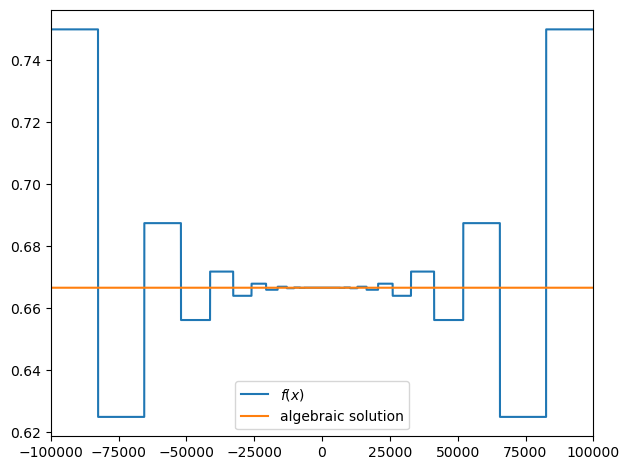

In [30]:
# Plot f(x)
x = np.linspace(-100000, 100000, 100000)
plt.plot(x, f(x), label=r'$f(x)$')
##########
# plt.plot(x, f(x)) !
# Hier besser x, f(x), damit auf der x-Achse auch die Werte und nicht die
# Indizes geplottet werden, an denen f(x) ist.
#########
plt.plot(x, 0*x + 2/3, label='algebraic solution')
plt.xlim(-100000, 100000)
plt.legend()
plt.tight_layout()
plt.show()

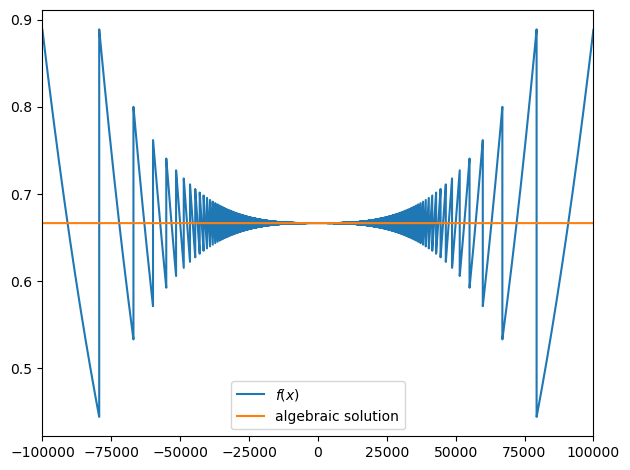

In [36]:
# Plot g(x)
x = np.linspace(-100000, 100000, 100000)
##########
# plt.plot(x, g(1/x)) !
# Hier besser x, g(1/x), damit auf der x-Achse auch die Werte und nicht die
# Indizes geplottet werden, an denen g(1/x) ist.
#########
plt.plot(x, g(1/x), label=r'$f(x)$') 
plt.plot(x, 0*x + 2/3, label='algebraic solution')
plt.xlim(-100000, 100000)
plt.legend()
plt.tight_layout()
plt.show()

<font color="red"> $\sum_{c}$1p. Maybe next time: look for correct values on the x-axis and use logspace when interested in values through many orders of magnitude.</font>

## d)

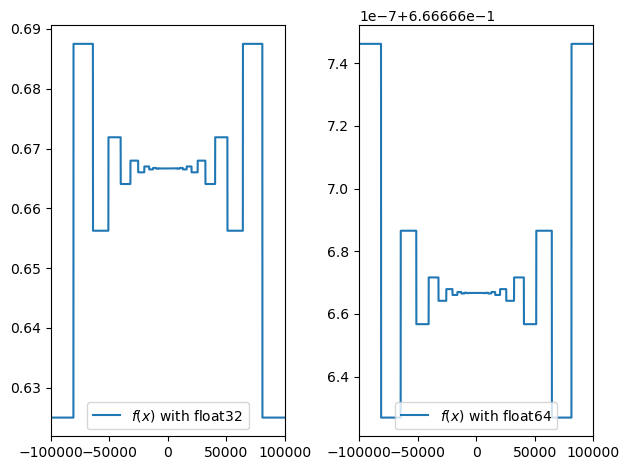

In [38]:
# Plot f(x)
x32 = np.linspace(-100, 100, 100000, dtype='float32')
x64 = np.linspace(-1000, 1000, 100000, dtype='float64')

plt.subplot(1, 2, 1)
plt.plot(x, f(x32), label=r'$f(x)$ with float32')
plt.xlim(-100000, 100000)
plt.legend(loc='lower center')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(x,f(x64), label=r'$f(x)$ with float64')
plt.xlim(-100000, 100000)
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

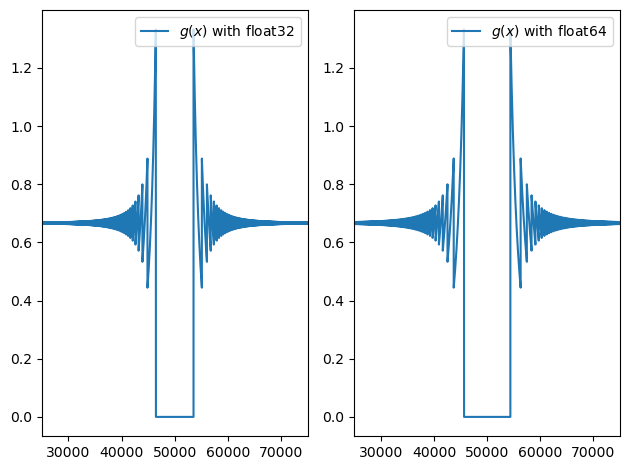

In [40]:
# Plot g(x)
x32 = np.linspace(-0.1, 0.1, 100000, dtype='float32')
x64 = np.linspace(-0.0001, 0.0001, 100000, dtype='float64')

plt.subplot(1, 2, 1)
plt.plot(g(x32), label=r'$g(x)$ with float32')
plt.xlim(25000, 75000)
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(g(x64), label=r'$g(x)$ with float64')
plt.xlim(25000, 75000)
plt.legend()
plt.tight_layout()
plt.show()

#### The float32 plot shows less numerical stable values than the float64 plot.

<font color="red"> $\sum_{d}$1p. That's correct, although I would argue it is kind of hard to see that on your plots. When directly comparing these things, maybe use the same y-axis and correct x-axis values. You again forgot to add the first argument with plt.plot, so matplotlib will just display the index of the array</font>

## <font color="red"> $\sum_{d}$4p -> Gerne vorstellen!</font>

# Exercise 2

## a)
#### The function is numerically unstable for $\theta \rightarrow 0$. This is true for $E \neq 0$.

In [41]:
# define mass
m = 511e3

#define functions
def gamma(E):
    return E/m

def beta(E):
    return np.sqrt(1-gamma(E)**(-2))

def f(E, theta):
    return (2+np.sin(theta)**2)/(1-(beta(E)**2)*(np.cos(theta)**2))

## b)
#### $\frac{2+\sin^2 \theta}{1-\beta^2 \cos^2 \theta}$ can be transformed to
#### $\frac{2+sin^2 \theta}{\frac{1}{\gamma^2}+(\beta sin \theta)^2}$ through using
#### $cos^2 \theta = 1 - sin^2 \theta$ and $\frac{1}{\gamma^2}=1-\beta^2$.

In [42]:
# define new function
def f_new(E, theta):
    return (2+np.sin(theta)**2)/(gamma(E)**(-2)+(beta(E)*np.sin(theta))**2)

## c)

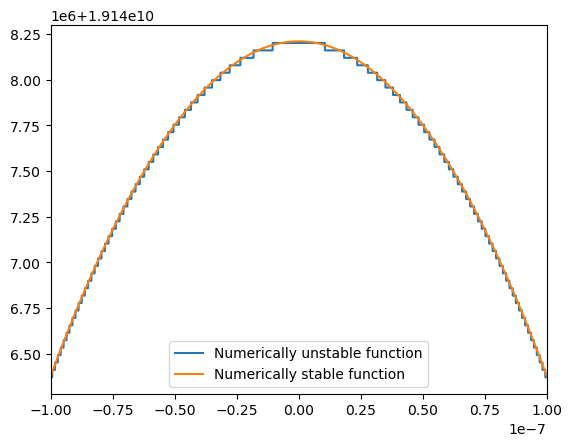

In [51]:
# plotting both functions in the critical interval
x = np.linspace(-1e-7, 1e-7, 100000, dtype='float64')
plt.plot(x, f(50e9, x), label='Numerically unstable function') #Fehler lag wieder beim x plotten
plt.plot(x, f_new(50e9, x), label='Numerically stable function')
plt.xlim(-1e-7,1e-7)
plt.legend()
plt.show()

## d)

The condition number is defined as,
$$
    K\equiv \left| \theta\cdot \frac{f'(\theta)}{f(\theta)} \right|.
$$
With $f(\theta)$ being the numerically stable version and 
$$f'(\theta)= \frac{2\cos(\theta)\left(\frac{1}{\gamma^2}+\beta^2\sin^2(\theta)\right)-\left(2+\sin^2(\theta)\right)\left(2\beta^2\cos(\theta)\right)}{\left(\frac{1}{\gamma^2}+\beta^2\sin^2(\theta)\right)}.$$
Finally the condition number is given as,
$$K=\left|\theta\frac{f'(\theta)}{f(\theta)} \right| = \left| \frac{2\theta\cos(\theta)}{2+\sin^2(\theta)}-\frac{2\theta\beta^2\cos(\theta)}{\frac{1}{\gamma^2}+(\beta\sin(\theta))^2} \right|.$$

## e)

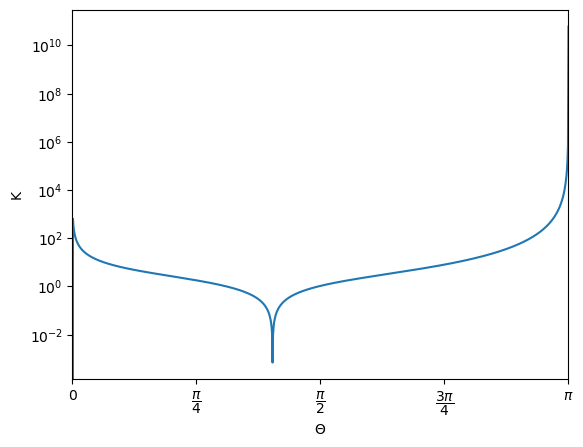

In [15]:
# define the condition number in code
def cond_numb(E, theta):
    return abs((2*theta*np.sin(theta))/(2+np.sin(theta)**2) - (2*theta * beta(E)**2 * np.cos(theta))/(1/(gamma(E)**2) + (beta(E)* np.sin(theta))**2)) 

x = np.linspace(0, np.pi, 1000)
plt.plot(x, cond_numb(50e9, x), label="condition number for $E=50$ GeV")

# make the plot look more beautiful
plt.xticks(np.arange(0, np.pi+0.001, step=np.pi/4), [r'$0$',r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$', r'$\pi$'])
plt.xlim(0, np.pi)
plt.yscale('log')
plt.xlabel(r'$\Theta$')
plt.ylabel('K')
plt.show()

## f)
**Stability** is the influence of rounding errors for *inexact* computation, while **condition** is the propagation of initial uncertainties for *exact* comptation. 
To be more precise, the difference between stability and condition is that one describes the error for inexact (stability) and one the error for exact (condition) cumputation.